**Iterative Scheme Example**

Want to solve the polynomial equation
$$
    p(x)=0
$$

In [2]:
p(x)=((3*x+2)*x+1)*x+1;

In [3]:
xs=[-1:0.1:1;];

In [4]:
ys=p.(xs);

In [5]:
using Plots

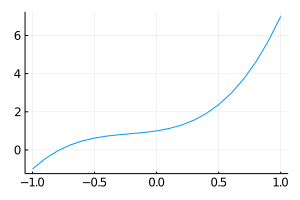

In [6]:
plot(xs,ys,size=[300,200],legend=false)

From the graph it appears the root $\alpha\approx 0.75$ and somewhere between $0.7$ and $0.8$.

Solve $3x^3+2x^2+x+1=0$ for $x$ in a simple way to
obtain $x=F(x)$ where
$$
    F(x)=-3x^3-2x^2-1.
$$

Now check whether $|F'(x)|<1$ near the root $\alpha$.

In [7]:
dF(x)=-(9*x+4)*x;

In [8]:
dF(-0.75)

-2.0625

In [10]:
dF(-0.8)

-2.5600000000000005

In [12]:
dF(-0.7)

-1.6099999999999999

As none of these values for $F'(x)$ have magnitude less
than $1$ the iterative scheme $x_{n+1}=F(x_n)$ is doomed.
However, it is possible to use the simple
trick of adding $mx$ to both sides
to obtain
$$
      3x^3+2x^2+(m+1)x+1=mx    
$$
and dividing so that now $x=F(x)$ where
$$
    F(x)={-3x^3-2x^2+mx-1\over m+1}.
$$

In [13]:
m=10
dF(x)=(-(9*x+4)*x+m)/(m+1);

In [14]:
dF(-0.75)

0.7215909090909091

In [15]:
dF(-0.8)

0.6763636363636363

In [17]:
dF(-0.7)

0.7627272727272728

Note that $|F'(x)|<1$ for the new $F$ 
in a neighborhood of the root.

Define the iteration
$$
    x_{n+1}=F(x_n)
$$
and check numerically how it converges.

In [20]:
F(x)=(((-3*x-2)*x+m)*x-1)/(m+1)

F (generic function with 1 method)

In [23]:
x=-0.75
for n=1:20
    x=F(x)
    println(n," ",x)
end

1 -0.7599431818181818
2 -0.7670751308110003
3 -0.7721371822812876
4 -0.7757025980518968
5 -0.7782000428150956
6 -0.779942560069474
7 -0.781154989966631
8 -0.7819969549081353
9 -0.782580861755282
10 -0.7829854227796318
11 -0.7832655403700722
12 -0.7834594054810547
13 -0.783593534388825
14 -0.7836863135772657
15 -0.7837504808103654
16 -0.7837948550353727
17 -0.7838255393856315
18 -0.7838467562608255
19 -0.7838614262884921
20 -0.7838715693739893


It's slowly converging to $\alpha\approx -0.7838\ldots$.
The Aitkin's $\delta^2$ process will be used next time
to accelerate this convergence using extrapolation.